#### sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [1]:
import pandas as pd

house_df = pd.read_csv('./datasets/housing.csv' , header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  , sep='\s+')

In [2]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#  feature와 label 
features = house_df.drop('MEDV' ,axis=1) 
label = house_df['MEDV']

In [4]:
#train set , test set
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

In [5]:
#data robust scaling 
from sklearn.preprocessing import RobustScaler ,StandardScaler , MinMaxScaler
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test) 

In [8]:
# modeling
from sklearn.linear_model import Ridge , LinearRegression
rg_regressor = Ridge()
rg_regressor.fit(scaled_X_train , y_train)

Ridge()

In [7]:
rg_regressor.coef_

array([-0.3504594 ,  0.56218619,  0.39932427,  2.72043738, -2.97415656,
        3.34085697, -0.29900119, -4.66166703,  1.92758981, -3.63655469,
       -3.08831153,  0.25215394, -4.84702453])

In [9]:
lr=LinearRegression()
lr.fit(scaled_X_train , y_train)

LinearRegression()

In [10]:
lr.coef_

array([-0.35290689,  0.60220928,  0.52373794,  2.7844382 , -3.07927138,
        3.31248077, -0.30285502, -4.79666938,  2.09943788, -4.12030629,
       -3.11255122,  0.25051595, -4.88228567])

In [11]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
# modeling
from sklearn.linear_model import Ridge , LinearRegression
rg_regressor = Ridge(alpha=10)
rg_regressor.fit(scaled_X_train , y_train)

Ridge(alpha=10)

In [13]:
rg_regressor.coef_

array([-0.33878289,  0.37722143, -0.06445195,  2.19209844, -2.24928226,
        3.5068176 , -0.27682434, -3.7509801 ,  1.19234956, -1.81139995,
       -2.88176052,  0.26282732, -4.57086384])

In [14]:
# modeling
from sklearn.linear_model import Ridge , LinearRegression
rg_regressor = Ridge(alpha=100)
rg_regressor.fit(scaled_X_train , y_train)

Ridge(alpha=100)

In [15]:
rg_regressor.coef_

array([-0.35774988,  0.23091374, -0.38609138,  0.81896758, -0.69637301,
        3.51301318, -0.22316807, -1.35915668,  0.18179095, -0.45258887,
       -1.9138125 ,  0.29564069, -3.09653531])

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Ridge(alpha= alpha)
    neg_mse_scores = cross_val_score(ridge, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.788
alpha 1 일 때, 5 fold의 평균 RMSE = 5.653
alpha 10 일 때, 5 fold의 평균 RMSE = 5.518
alpha 100 일 때, 5 fold의 평균 RMSE = 5.33


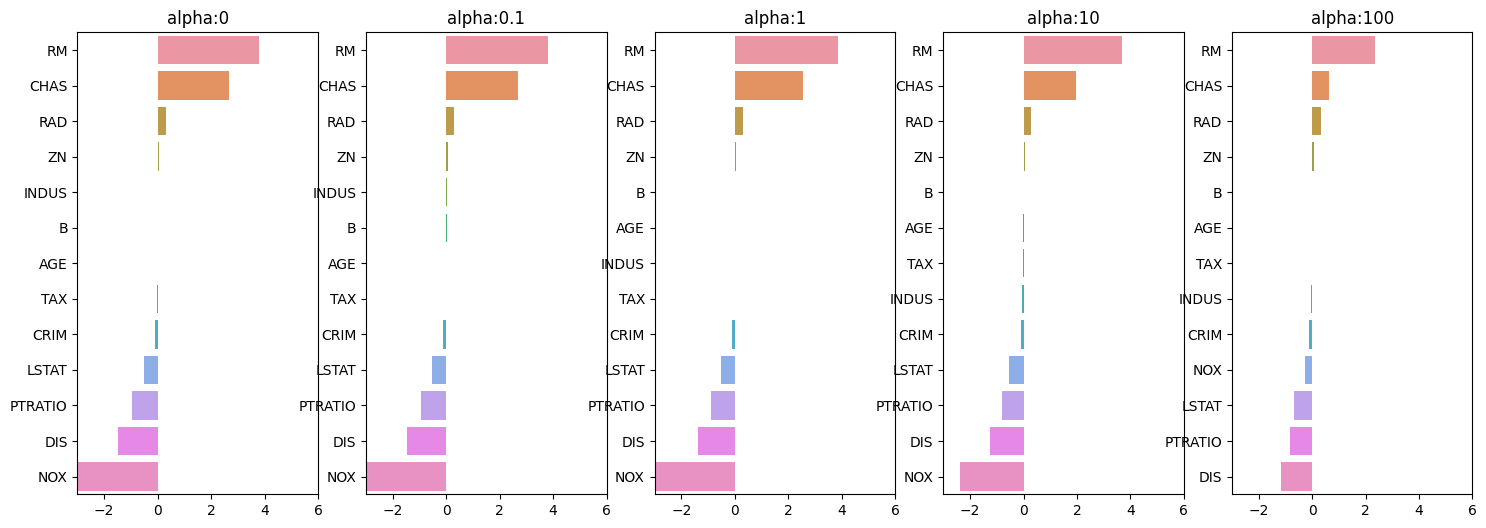

In [21]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

fig , axs = plt.subplots (figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate (alphas) :
    ridge = Ridge(alpha= alpha)
    ridge.fit(features, label)
    
    coeff = pd.Series(data = ridge.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

#### sklearn.linear_model.Lasso
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import Lasso
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Lasso(alpha= alpha)
    neg_mse_scores = cross_val_score(ridge, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.615
alpha 1 일 때, 5 fold의 평균 RMSE = 5.776
alpha 10 일 때, 5 fold의 평균 RMSE = 6.586
alpha 100 일 때, 5 fold의 평균 RMSE = 8.393


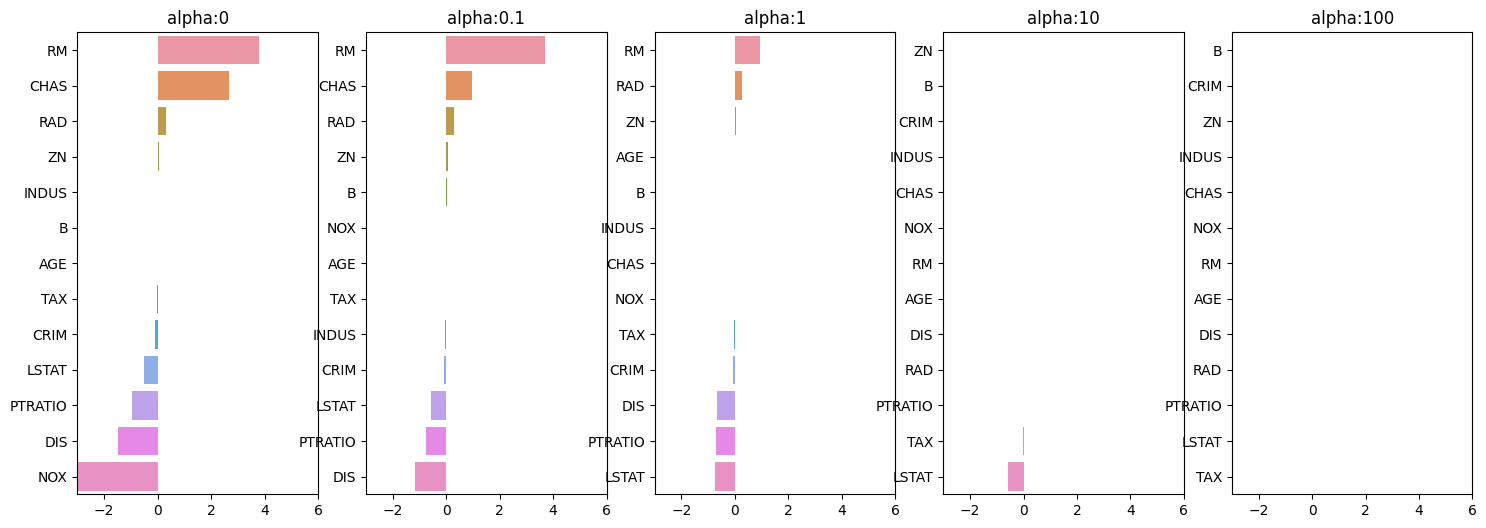

In [24]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

fig , axs = plt.subplots (figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate (alphas) :
    lasso = Lasso(alpha= alpha)
    lasso.fit(features, label)
    
    coeff = pd.Series(data = lasso.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

#### sklearn.linear_model.ElasticNet
* class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import ElasticNet
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    elasticnet = ElasticNet(alpha= alpha , l1_ratio=0.6)
    neg_mse_scores = cross_val_score(elasticnet, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

alpha 0 일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1 일 때, 5 fold의 평균 RMSE = 5.501
alpha 1 일 때, 5 fold의 평균 RMSE = 5.555
alpha 10 일 때, 5 fold의 평균 RMSE = 6.49
alpha 100 일 때, 5 fold의 평균 RMSE = 8.33


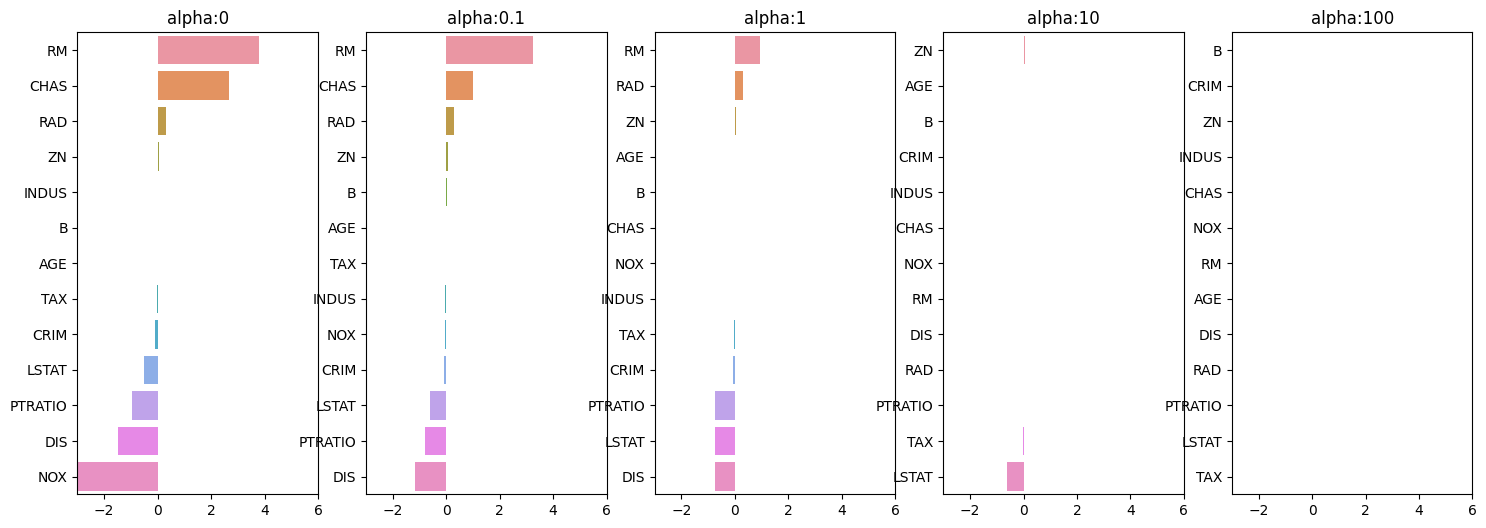

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axs = plt.subplots (figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate (alphas) :
    elasticnet = ElasticNet(alpha= alpha)
    elasticnet.fit(features, label)
    
    coeff = pd.Series(data = elasticnet.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()